# 先指数平均后回归 vs. 先回归后指数平均

验证求beta时，对收益序列进行指数平均，之后进行回归，与先回归，然后对beta进行指数平均的区别

结论：二者无区别

In [1]:
import statsmodels.api as sm

In [2]:
import numpy as np 

In [3]:
x = np.linspace(0,100,500)

In [4]:
x

array([  0.        ,   0.2004008 ,   0.4008016 ,   0.6012024 ,
         0.80160321,   1.00200401,   1.20240481,   1.40280561,
         1.60320641,   1.80360721,   2.00400802,   2.20440882,
         2.40480962,   2.60521042,   2.80561122,   3.00601202,
         3.20641283,   3.40681363,   3.60721443,   3.80761523,
         4.00801603,   4.20841683,   4.40881764,   4.60921844,
         4.80961924,   5.01002004,   5.21042084,   5.41082164,
         5.61122244,   5.81162325,   6.01202405,   6.21242485,
         6.41282565,   6.61322645,   6.81362725,   7.01402806,
         7.21442886,   7.41482966,   7.61523046,   7.81563126,
         8.01603206,   8.21643287,   8.41683367,   8.61723447,
         8.81763527,   9.01803607,   9.21843687,   9.41883768,
         9.61923848,   9.81963928,  10.02004008,  10.22044088,
        10.42084168,  10.62124248,  10.82164329,  11.02204409,
        11.22244489,  11.42284569,  11.62324649,  11.82364729,
        12.0240481 ,  12.2244489 ,  12.4248497 ,  12.62

In [39]:
# 产生y序列
y = [0]*500
for i in range(0,500):
    y[i] = 3 * x[i] + 20 + 10*np.random.normal(0,1)

In [40]:
y

[36.47036401478765,
 -9.15413795719343,
 21.302125213040522,
 23.53758229466774,
 20.914745492080936,
 11.281213877651869,
 6.246758898369119,
 28.557056540797348,
 21.32913331454708,
 23.028627088177753,
 28.40144264251701,
 31.13464886013673,
 27.93286818700303,
 52.06559291927877,
 22.81748726065533,
 19.715523805385732,
 42.60283918334144,
 12.506680962325976,
 45.209309359248,
 35.44396952851161,
 23.06327092235459,
 47.001455483262845,
 34.89581288737181,
 19.380711263456735,
 45.06707153092688,
 38.01283432279918,
 54.04622938446332,
 40.90324738806203,
 34.619334492720085,
 34.737371968555536,
 40.11647187122682,
 53.864057248848866,
 44.96409065117713,
 39.54659944923638,
 41.60578109995827,
 50.75076253551764,
 44.43650340899181,
 39.297830814342916,
 63.173369637427335,
 45.237665140744795,
 66.38592532088978,
 61.92695437107516,
 39.03990924622651,
 49.46031789283854,
 63.10578823195565,
 59.22588751526804,
 50.33387247411079,
 70.2952034349201,
 46.300009101522825,
 44.920

In [41]:
# 产生指数递减权重序列
weight = [0]*250 

for i in range(0,250):
    weight[i] = np.power(0.5,(249-i)/60)

In [42]:
weight

[0.05632815391317687,
 0.056982655534888536,
 0.05764476209912122,
 0.05831456197105048,
 0.05899214454260585,
 0.059677600244401045,
 0.06037102055780286,
 0.061072498027140376,
 0.06178212627205601,
 0.0625,
 0.06322621501887016,
 0.06396086824979842,
 0.06470405774008609,
 0.06545588267628918,
 0.06621644339745596,
 0.06698584140851832,
 0.06776417939383865,
 0.06855156123091412,
 0.0693480920042403,
 0.0701538780193358,
 0.07096902681692982,
 0.0717936471873147,
 0.07262784918486498,
 0.07347174414272555,
 0.07432544468767006,
 0.07518906475513229,
 0.07606271960441192,
 0.07694652583405726,
 0.07784060139742645,
 0.07874506561842957,
 0.07966003920745389,
 0.0805856442774737,
 0.08152200436034776,
 0.08246924442330589,
 0.08342749088562713,
 0.08439687163551186,
 0.08537751604714973,
 0.08636955499798601,
 0.08737312088618872,
 0.08838834764831845,
 0.08941537077720364,
 0.09045432734002362,
 0.09150535599660158,
 0.09256859701791027,
 0.09364419230479261,
 0.09473228540689989,
 0

In [43]:
# 产生指数平均序列
average_x = [0]*250
box = [0]*250
for i in range(250,500):
    ave_box = sum(x[i-250:i]*weight)/sum(weight)
    average_x[i-250] = ave_box

In [44]:
average_x

[35.60689953198502,
 35.80730033358824,
 36.007701135191425,
 36.208101936794634,
 36.40850273839783,
 36.608903540001045,
 36.80930434160425,
 37.00970514320746,
 37.210105944810664,
 37.41050674641387,
 37.6109075480171,
 37.81130834962029,
 38.01170915122349,
 38.21210995282669,
 38.412510754429924,
 38.612911556033104,
 38.81331235763632,
 39.01371315923954,
 39.21411396084273,
 39.41451476244593,
 39.61491556404916,
 39.815316365652365,
 40.015717167255545,
 40.21611796885876,
 40.41651877046198,
 40.61691957206516,
 40.81732037366837,
 41.01772117527159,
 41.2181219768748,
 41.418522778478,
 41.6189235800812,
 41.81932438168441,
 42.01972518328761,
 42.22012598489082,
 42.42052678649405,
 42.62092758809726,
 42.821328389700454,
 43.02172919130366,
 43.22212999290687,
 43.42253079451006,
 43.62293159611329,
 43.82333239771647,
 44.02373319931969,
 44.2241340009229,
 44.42453480252611,
 44.624935604129284,
 44.82533640573253,
 45.02573720733572,
 45.226138008938925,
 45.42653881054

In [45]:
# 产生指数平均序列
average_y = [0]*250
box = [0]*250
for i in range(250,500):
    sum_weight = sum(weight)
    sum_box=0
    for j in range(0,250):
        sum_box = sum_box + y[i-250:i][j]*weight[j]
    average_y[i-250] = sum_box/sum_weight

In [46]:
average_y

[127.93661349518622,
 128.57106149711913,
 129.3326181568592,
 129.97650770107654,
 130.51078387081714,
 131.07877021686335,
 131.68706780364678,
 132.39828616615125,
 133.02408728249713,
 133.58632473343232,
 134.1676503971885,
 134.78600137740355,
 135.3899033743258,
 136.03179235950822,
 136.63813284879387,
 137.2117173046325,
 137.65488645103508,
 138.43574621087626,
 138.97171734255522,
 139.70611364787817,
 140.4120870246493,
 141.14486263576777,
 141.81130261572892,
 142.2171765940454,
 142.81282990318417,
 143.4246212765183,
 143.88395077570786,
 144.44632862665574,
 144.93829561292205,
 145.44850071766683,
 145.9540304975385,
 146.27044362682167,
 146.79603856277703,
 147.4962512103934,
 148.10259631758547,
 148.7100240554717,
 149.24952891447654,
 149.99120721015632,
 150.79185707399844,
 151.51076740644905,
 152.12779015421938,
 152.85427048512736,
 153.55451043919925,
 154.04513900609487,
 154.6353940381931,
 155.18472024952143,
 155.7889369258827,
 156.25339683683336,
 156

In [47]:
average_x_array = sm.add_constant(average_x)

In [48]:
average_x_array

array([[ 1.        , 35.60689953],
       [ 1.        , 35.80730033],
       [ 1.        , 36.00770114],
       [ 1.        , 36.20810194],
       [ 1.        , 36.40850274],
       [ 1.        , 36.60890354],
       [ 1.        , 36.80930434],
       [ 1.        , 37.00970514],
       [ 1.        , 37.21010594],
       [ 1.        , 37.41050675],
       [ 1.        , 37.61090755],
       [ 1.        , 37.81130835],
       [ 1.        , 38.01170915],
       [ 1.        , 38.21210995],
       [ 1.        , 38.41251075],
       [ 1.        , 38.61291156],
       [ 1.        , 38.81331236],
       [ 1.        , 39.01371316],
       [ 1.        , 39.21411396],
       [ 1.        , 39.41451476],
       [ 1.        , 39.61491556],
       [ 1.        , 39.81531637],
       [ 1.        , 40.01571717],
       [ 1.        , 40.21611797],
       [ 1.        , 40.41651877],
       [ 1.        , 40.61691957],
       [ 1.        , 40.81732037],
       [ 1.        , 41.01772118],
       [ 1.        ,

In [49]:
average_of_x = sm.OLS(average_y,average_x_array).fit().params

In [50]:
# 回归结果：先对序列进行指数平均，然后回归
average_of_x

array([22.30288032,  2.97881655])

In [51]:
#无截距回归

no_con = sm.OLS(average_y,average_x).fit().params
no_con

array([3.32724003])

In [52]:
fit = sm.OLS(average_y,average_x).fit()

In [32]:
residual = np.array(average_y) -  no_con[0] * np.array(average_x)

In [33]:
residual

array([ 0.88760277,  0.76580618,  0.76773267,  0.91896106,  0.77270425,
        0.88873616,  0.77508222,  0.59214731,  0.54348263,  0.74369492,
        0.91885969,  0.82197327,  0.78266604,  0.97742233,  1.05191522,
        0.98496376,  1.0575743 ,  1.20606683,  1.2040429 ,  1.17721936,
        1.36938152,  1.40141368,  1.53844174,  1.5265434 ,  1.43212728,
        1.547414  ,  1.34145914,  1.33648263,  1.52611114,  1.33673165,
        1.67118988,  1.68314442,  1.70741237,  1.79246983,  1.69763643,
        1.61620824,  1.79266107,  1.85702352,  1.86792437,  1.88174131,
        1.95284976,  1.91032906,  1.90654175,  1.93150159,  1.74820448,
        1.66042852,  1.25415966,  1.13014931,  1.14160982,  1.1212068 ,
        0.9065214 ,  0.66427224,  0.53766673,  0.59455275,  0.59734882,
        0.64601435,  0.52974939,  0.38502565,  0.43799972,  0.13243317,
        0.04249437,  0.24469058,  0.24959257,  0.41498707,  0.17403452,
        0.22446628,  0.20077249,  0.23456163,  0.2236701 ,  0.23

In [34]:
sum(residual)

14.265854313750125

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

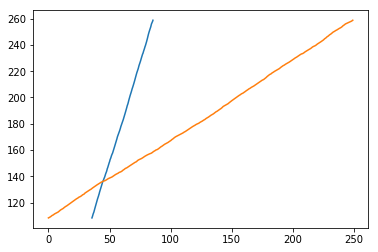

In [38]:
plt.plot(np.array(average_x),np.array(average_y))


In [17]:
x_array = sm.add_constant(x)

In [18]:
x_array

array([[  1.        ,   0.        ],
       [  1.        ,   0.2004008 ],
       [  1.        ,   0.4008016 ],
       [  1.        ,   0.6012024 ],
       [  1.        ,   0.80160321],
       [  1.        ,   1.00200401],
       [  1.        ,   1.20240481],
       [  1.        ,   1.40280561],
       [  1.        ,   1.60320641],
       [  1.        ,   1.80360721],
       [  1.        ,   2.00400802],
       [  1.        ,   2.20440882],
       [  1.        ,   2.40480962],
       [  1.        ,   2.60521042],
       [  1.        ,   2.80561122],
       [  1.        ,   3.00601202],
       [  1.        ,   3.20641283],
       [  1.        ,   3.40681363],
       [  1.        ,   3.60721443],
       [  1.        ,   3.80761523],
       [  1.        ,   4.00801603],
       [  1.        ,   4.20841683],
       [  1.        ,   4.40881764],
       [  1.        ,   4.60921844],
       [  1.        ,   4.80961924],
       [  1.        ,   5.01002004],
       [  1.        ,   5.21042084],
 

In [19]:
beta = [0]*250
for i in range(0,250):
    para = sm.OLS(y[i:i+250],x_array[i:i+250]).fit().params[1]
    beta[i] = para
beta

[2.9652914180341083,
 2.9595111040108772,
 2.964662066435876,
 2.970092673628878,
 2.9677818167116383,
 2.9706646323491377,
 2.9643524567584727,
 2.9625454938896914,
 2.9588868095131775,
 2.9661398145213056,
 2.9862491274317438,
 2.986399011871073,
 2.9863322417418945,
 2.9909044212815687,
 2.994242506490438,
 2.988014867894409,
 2.9909448294931917,
 2.9899086784567337,
 2.989988267157759,
 2.990384197935281,
 2.9884208759506308,
 2.9869861544336196,
 2.9908524052943206,
 2.9850232285973965,
 2.9818763810659354,
 2.983137814574274,
 2.98258911019463,
 2.9851184470996426,
 2.9866175954250833,
 2.9746906423037176,
 2.994780319470983,
 2.990132642620421,
 2.995404236449464,
 2.9977021201576743,
 2.9991195417022274,
 2.988214829387921,
 3.0013518531602243,
 3.0010675276207284,
 3.000715436051803,
 2.9985934546134274,
 2.993762333175128,
 2.9915873709521366,
 2.993420859999355,
 2.9933458784659543,
 2.975148913824097,
 2.968380556570618,
 2.9502248412400354,
 2.9413351544406985,
 2.94287418

In [20]:
sum(beta*weight)/sum(weight)

TypeError: can't multiply sequence by non-int of type 'list'

In [ ]:
cum_sum = 0
for i in range(0,250):
    cum_sum = cum_sum + weight[i]*beta[i]
average_of_beta = cum_sum/sum(weight)

In [ ]:
# 结果：先回归，然后对回国结果进行指数平均
average_of_beta

In [ ]:
beta = sm.OLS(average_y,average_x_array).fit().params[1]
beta

In [ ]:
beta = sm.OLS(average_y,average_x_array,weight[250:]).fit().params[1]
beta